# End-to-end multi-class dog breed classification

This notebook builds an end-to-end multi-class image
classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data is from Kaggle's dog breed identification
competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* Dealing with images (unstructured data).
* There are 120 breeds of dogs (120 different classes).
* There are approximately 10,000 images in the training set.
* There are approximately 10,000 images in the test set.

In [3]:
#!unzip "drive/My Drive/Dog Classification/dog-breed-identification.zip" -d "drive/My Drive/Dog Classification/"

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.2.0
Hub version: 0.8.0
GPU available


In [3]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/My Drive/Dog Classification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     beb5d7cd3bf499086ec61617dd8ae871  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


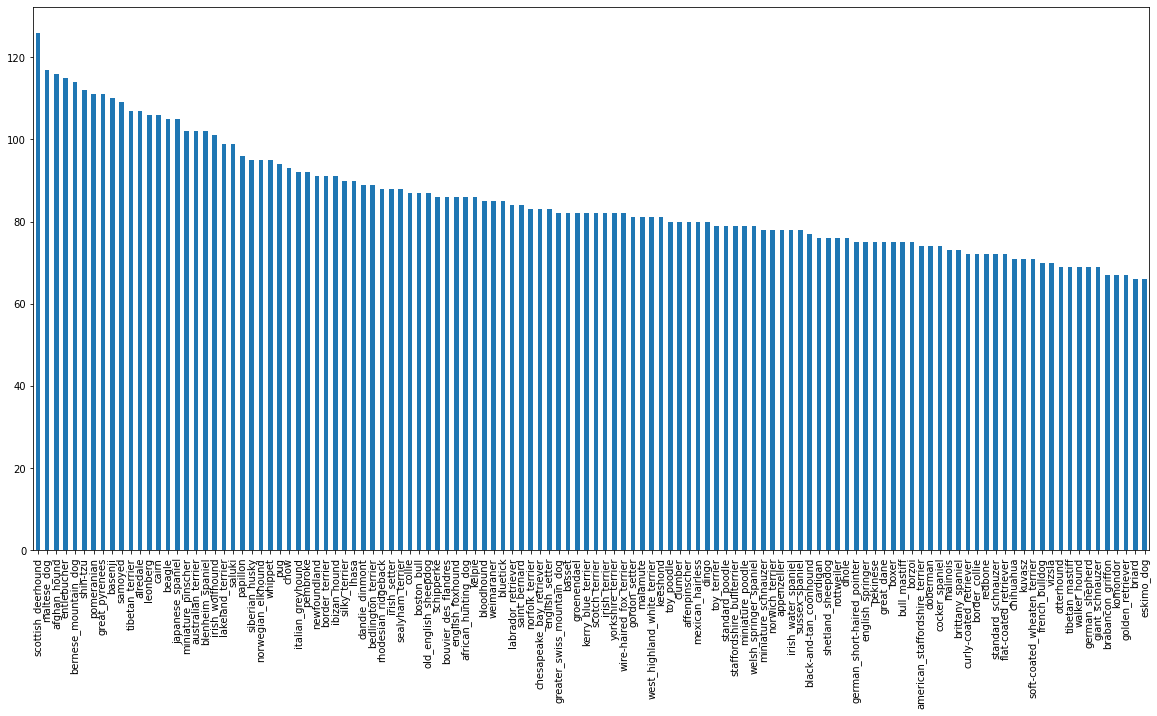

In [4]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

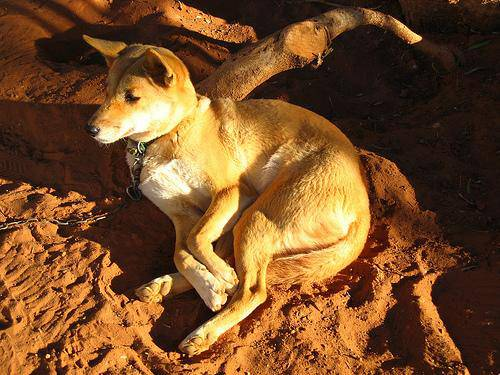

In [5]:
from IPython.display import Image
Image("/content/drive/My Drive/Dog Classification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")


In [6]:
filenames = ["drive/My Drive/Dog Classification/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/My Drive/Dog Classification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Classification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Classification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Classification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Classification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Classification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Classification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Classification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Classification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Classification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [7]:
import os
if len(os.listdir("drive/My Drive/Dog Classification/train/")) == len(filenames):
  print("Filenames match the amount of files")
else:
  print("Filenames don't match the amount of files")

Filenames match the amount of files


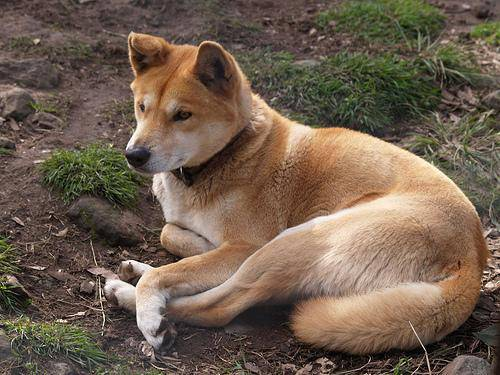

In [8]:
Image(filenames[4000])

In [9]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [10]:
len(labels)

10222

In [11]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [12]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [13]:
len(boolean_labels)

10222

In [14]:
print(labels[2])
print(np.where(unique_breeds == labels[2]))
print(boolean_labels[2].argmax())
print(boolean_labels[2].astype(int))

pekinese
(array([85]),)
85
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [15]:
X = filenames
y = boolean_labels

In [16]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)
                                                  

(800, 800, 200, 200)

In [18]:
IMG_SIZE = 224

def process_image(image_path):

  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [19]:
def get_image_label(image_path, label):

  image = process_image(image_path)
  
  return image, label

In [20]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [21]:
# batch function, starting with 32
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)

    return data_batch 

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    
    return data_batch

In [22]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [23]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [24]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  plt.figure(figsize=(10, 10))

  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")
    

In [25]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

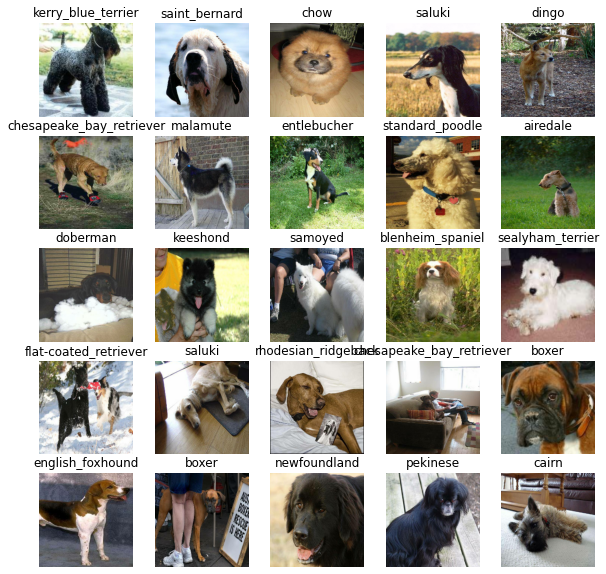

In [26]:
show_25_images(train_images, train_labels)

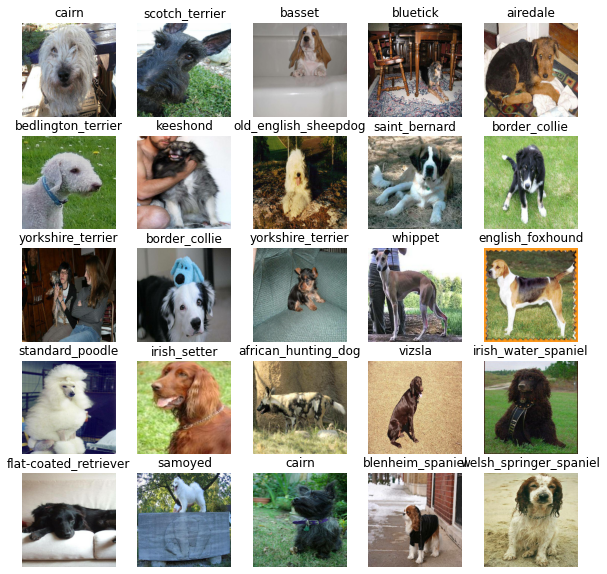

In [27]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [28]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

OUTPUT_SHAPE = len(unique_breeds)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [29]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  model=tf.keras.Sequential([
                             hub.KerasLayer(MODEL_URL),
                             tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                   activation="softmax")
  ])

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  model.build(INPUT_SHAPE)

  return model

In [30]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [31]:
%load_ext tensorboard

In [32]:
import datetime

def create_tensorboard_callback():
  logdir = os.path.join("drive/My Drive/Dog Classification/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [34]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [35]:
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available


In [73]:
def train_model():
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model

In [74]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 442s 18s/step - loss: 4.5078 - accuracy: 0.1125 - val_loss: 3.5737 - val_accuracy: 0.2050
Epoch 2/100
25/25 [==============================] - 6s 251ms/step - loss: 1.5964 - accuracy: 0.7025 - val_loss: 2.2580 - val_accuracy: 0.4700
Epoch 3/100
25/25 [==============================] - 6s 251ms/step - loss: 0.5483 - accuracy: 0.9450 - val_loss: 1.7761 - val_accuracy: 0.5600
Epoch 4/100
25/25 [==============================] - 6s 247ms/step - loss: 0.2483 - accuracy: 0.9837 - val_loss: 1.5756 - val_accuracy: 0.5850
Epoch 5/100
25/25 [==============================] - 6s 247ms/step - loss: 0.1447 - accuracy: 0.9975 - val_loss: 1.4929 - val_accuracy: 0.6000
Epoch 6/100
25/25 [==============================] - 6s 244ms/step - loss: 0.0986 - accuracy: 1.0000 - val_loss: 1.4522 - val_accuracy: 0.6000
Epoch 7/100
25/25 [==============================

In [75]:
%tensorboard --logdir drive/My\ Drive/Dog\ Classification/logs/20200717-174131

Reusing TensorBoard on port 6006 (pid 1143), started 3:25:12 ago. (Use '!kill 1143' to kill it.)

<IPython.core.display.Javascript object>

In [76]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 158ms/step


array([[5.1684590e-04, 5.5915578e-05, 9.2870661e-04, ..., 7.7749566e-05,
        1.9601053e-05, 5.1303832e-03],
       [4.8021195e-04, 9.3991206e-05, 3.2500220e-03, ..., 1.5350325e-04,
        8.0033188e-04, 1.0729788e-05],
       [9.9370964e-06, 1.5303608e-04, 4.5854836e-06, ..., 1.8226743e-05,
        6.0055863e-06, 2.0279100e-05],
       ...,
       [3.5778205e-05, 1.8060273e-05, 1.6018201e-04, ..., 7.0810074e-06,
        6.4926519e-04, 1.1558607e-03],
       [8.1266994e-03, 1.9441030e-04, 1.5995369e-04, ..., 2.4624821e-04,
        7.4882038e-05, 4.4615567e-03],
       [3.8606205e-04, 6.5100362e-06, 2.4118663e-03, ..., 4.0564078e-04,
        6.7493739e-04, 2.5018287e-05]], dtype=float32)

In [77]:
index = 0
print(predictions[index])
print(f'Max value (probability of prediction): {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Predict label: {unique_breeds[np.argmax(predictions[index])]}')

[5.16845903e-04 5.59155778e-05 9.28706606e-04 1.47682476e-05
 3.21420463e-04 1.44811665e-05 3.07611264e-02 1.26882200e-03
 2.56989762e-04 2.57968524e-04 2.62167305e-04 5.78705040e-05
 1.43937432e-04 1.38915675e-05 4.44796693e-04 9.37343517e-04
 4.49426734e-05 6.65067315e-01 1.55373651e-04 1.42222241e-04
 3.28290917e-04 3.54440781e-05 2.61692931e-05 1.33144169e-03
 2.77834406e-05 4.53017507e-04 5.06922752e-02 2.16482331e-05
 1.07086427e-03 2.62954563e-04 6.32141673e-05 1.88694661e-03
 2.83958681e-04 6.35099877e-06 5.53119844e-06 1.36697376e-02
 2.02531355e-05 6.16564867e-05 8.22337825e-05 6.73077593e-05
 6.64812047e-04 7.76193992e-05 8.98535473e-06 2.36222098e-04
 4.16148532e-06 3.16030928e-05 3.66862114e-05 2.25137555e-04
 6.03163906e-04 9.87002932e-05 2.11999679e-04 5.97896178e-05
 1.02085512e-04 8.26752366e-05 3.33351054e-05 2.27694309e-05
 2.24024159e-04 7.13228667e-03 9.86696177e-05 3.60039286e-02
 1.18276344e-04 6.03342851e-05 1.85242825e-04 1.74278193e-05
 1.84059987e-04 4.815343

In [78]:
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[5])
pred_label

'bedlington_terrier'

In [79]:
images_ = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [80]:
get_pred_label(labels_[0])

'cairn'

In [81]:
get_pred_label(predictions[0])

'border_terrier'

In [82]:
def unbatchify(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [83]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                   np.max(pred_prob)*100,
                                   true_label),
                                   color=color)

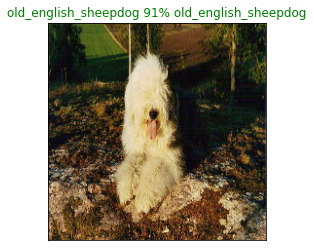

In [84]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=7)

In [85]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  pred_label = get_pred_label(pred_prob)
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="gray")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

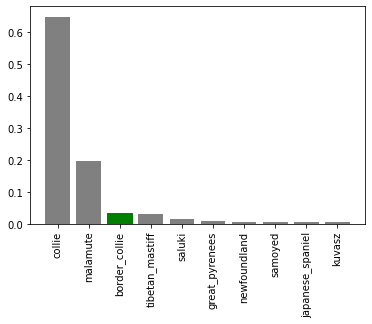

In [86]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

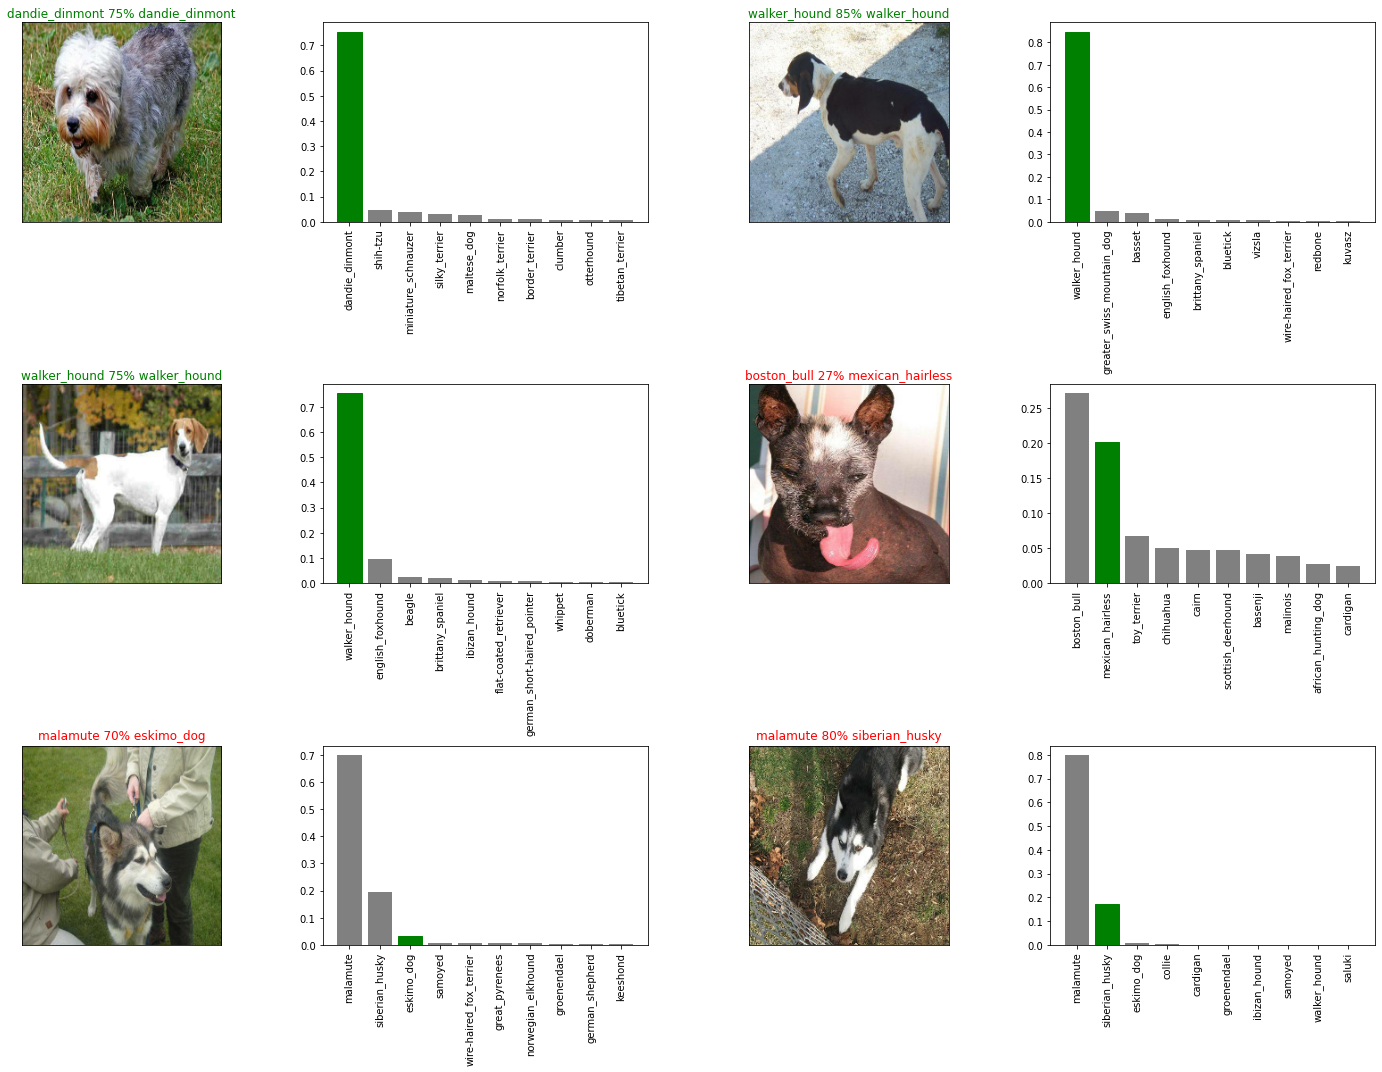

In [87]:
i_multiplier = 30
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)  
plt.show()

In [67]:
def save_model(model, suffix=None):
  model_dir = os.path.join("drive/My Drive/Dog Classification/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = model_dir + "-" + suffix + ".h5"
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [52]:
def load_model(model_path):
  print(f'Loading saved model from: {model_path}')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [73]:
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Classification/models/20200720-19551595274906-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Classification/models/20200720-19551595274906-1000-images-mobilenetv2-Adam.h5'

In [74]:
loaded_1000_image_model = load_model('drive/My Drive/Dog Classification/models/20200720-19511595274716-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Classification/models/20200720-19511595274716-1000-images-mobilenetv2-Adam.h5


In [75]:
model.evaluate(val_data)

7/7 [==============================] - 1s 135ms/step - loss: 1.3026 - accuracy: 0.6650


[1.3025500774383545, 0.6650000214576721]

In [76]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 123ms/step - loss: 1.3026 - accuracy: 0.6650


[1.3025500774383545, 0.6650000214576721]

In [49]:
full_data = create_data_batches(X, y)

Creating training data batches...


In [50]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [79]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [80]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [81]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 5565s 17s/step - loss: 1.3177 - accuracy: 0.6752
Epoch 2/100
320/320 [==============================] - 60s 187ms/step - loss: 0.3962 - accuracy: 0.8829
Epoch 3/100
320/320 [==============================] - 59s 186ms/step - loss: 0.2312 - accuracy: 0.9375
Epoch 4/100
320/320 [==============================] - 59s 184ms/step - loss: 0.1533 - accuracy: 0.9634
Epoch 5/100
320/320 [==============================] - 60s 187ms/step - loss: 0.1045 - accuracy: 0.9798
Epoch 6/100
320/320 [==============================] - 59s 185ms/step - loss: 0.0766 - accuracy: 0.9875
Epoch 7/100
320/320 [==============================] - 60s 187ms/step - loss: 0.0586 - accuracy: 0.9911
Epoch 8/100
320/320 [==============================] - 60s 187ms/step - loss: 0.0456 - accuracy: 0.9950
Epoch 9/100
320/320 [==============================] - 59s 186ms/step - loss: 0.0379 - accuracy: 0.9959
Epoch 10/100
320/320 [==============================] - 60s 188m

In [82]:
save_model(model, suffix="all-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Classification/models/20200721-00041595289845-all-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Classification/models/20200721-00041595289845-all-images-mobilenetv2-Adam.h5'

In [53]:
loaded_full_model = load_model("drive/My Drive/Dog Classification/models/20200721-00041595289845-all-images-mobilenetv2-Adam.h5")

Loading saved model from: drive/My Drive/Dog Classification/models/20200721-00041595289845-all-images-mobilenetv2-Adam.h5


In [59]:
test_path = "drive/My Drive/Dog Classification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

In [60]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [61]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [62]:
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 7235s 22s/step


In [63]:
np.savetxt("drive/My Drive/Dog Classification/preds_array.csv", test_predictions, delimiter=",")

In [64]:
test_predictions = np.loadtxt("drive/My Drive/Dog Classification/preds_array.csv", delimiter=",")

In [65]:
test_predictions[:10]

array([[2.13202220e-04, 6.01521111e-04, 2.98334344e-04, ...,
        1.63363235e-03, 2.26162560e-03, 9.66571461e-05],
       [4.34657821e-04, 3.71897419e-04, 8.64333651e-06, ...,
        7.58584865e-05, 6.49940848e-05, 3.30760726e-04],
       [2.41692323e-05, 1.34493430e-05, 6.27046276e-04, ...,
        3.35535454e-03, 3.71160626e-04, 3.00544907e-05],
       ...,
       [1.40673073e-03, 1.27033442e-02, 6.49853755e-05, ...,
        2.87635849e-05, 1.13761751e-04, 6.23754822e-05],
       [1.46697785e-04, 3.08982380e-05, 2.12434941e-04, ...,
        3.33285338e-04, 1.98430804e-04, 6.43211679e-05],
       [6.09467621e-04, 1.05141022e-04, 9.28602934e-01, ...,
        1.07514551e-02, 4.44888647e-05, 9.74542927e-04]])

In [66]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [69]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [70]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  ef5c93599bcc330fd9642266d9650309  ...       9.66571e-05
1  e8763575a23f1e1a86788b82bd105f07  ...       0.000330761
2  e8914f74848c23b70b520887b3ff2e8a  ...       3.00545e-05
3  ecf3d6520cec171b81830fb38fce1570  ...        3.3928e-06
4  eee7c863af47e22f285f8aeb80adb4b9  ...        0.00412595

[5 rows x 121 columns]

In [71]:
preds_df.to_csv("drive/My Drive/Dog Classification/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)